In [1]:
import pandas as pd

housing=pd.read_csv("d:/data/house/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts() # 범주형 변수의 카테고리별 샘플 개수

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


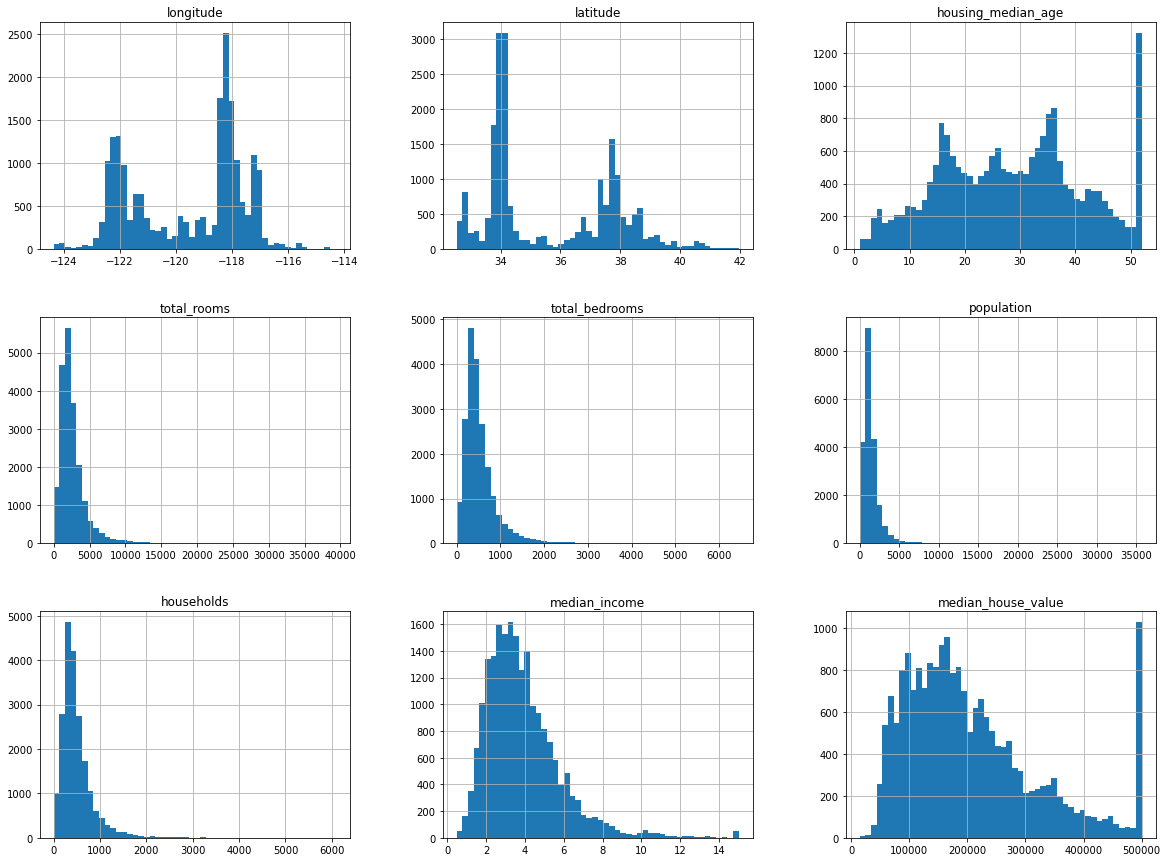

In [5]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
import numpy as np
np.random.seed(10)

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=10)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


<AxesSubplot:>

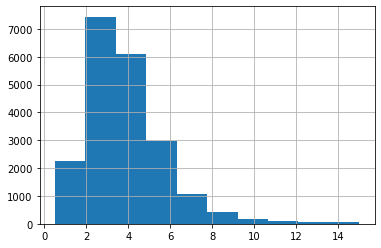

In [8]:
housing["median_income"].hist()
# 소득 카테고리가 다양함

In [9]:
# 소득 카테고리 개수를 제한하기 위해 1.5로 나누고
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
# 5보다 작은 값들은 그대로 5보다 큰 값들은 5로 조정
housing["income_cat"].where(housing["income_cat"]<5, 5.0, inplace=True)


In [10]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

<AxesSubplot:>

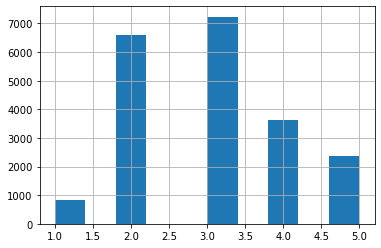

In [11]:
housing['income_cat'].hist() # 카테고리 조정 후의 히스토그램

[Text(0.5, 0, 'logitude'), Text(0, 0.5, 'latitude')]

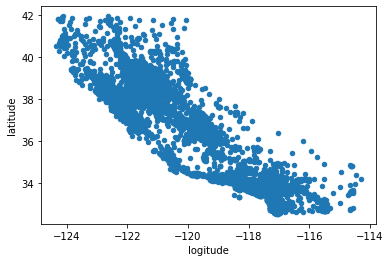

In [12]:
# 데이터 이해를 위한 탐색과 시각화
ax=housing.plot(kind='scatter', x='longitude', y='latitude')
ax.set(xlabel='logitude', ylabel='latitude')

[Text(0.5, 0, 'logitude'), Text(0, 0.5, 'latitude')]

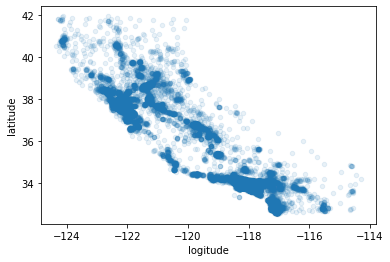

In [13]:
# alpha 옵션으로 0.1로 주면 데이터 포인트가 밀집된 지역을 볼 수 있음
ax=housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)
ax.set(xlabel='logitude', ylabel='latitude')

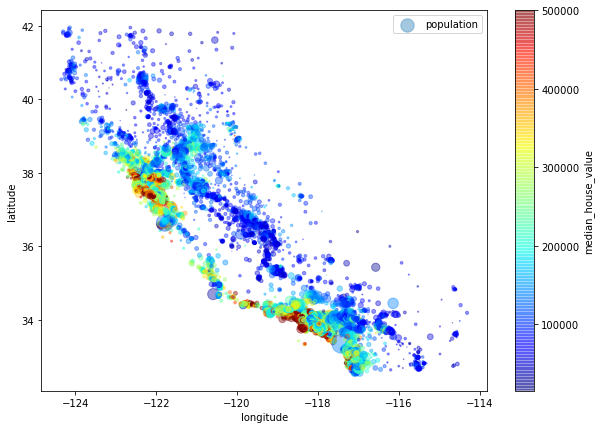

In [14]:
ax=housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing['population']/100,
label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
sharex=False)
plt.legend()
# 해안가의 주택 가격의 높음

In [15]:
corr_matrix=housing.corr() # 상관계수

In [16]:
# median_house_value(중위 주택 가격)을 기준으로 상관계수 출력 (-1 ~ 1)
corr_matrix['median_house_value'].sort_values(ascending=False)
# median_income(중위 소득)과 주택 가격의 상관관계가 높음
# latitude(위도)와 주택 가격의 음의 상관관계 - 북쪽으로 갈수록 주택 가격이 낮아짐

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

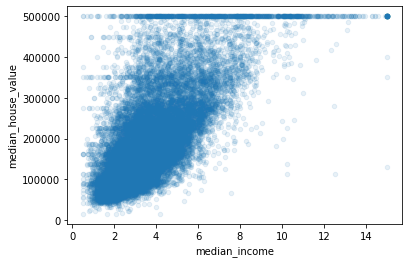

In [17]:
# 산점도(중위 소득과 중위 주택 가격) - 강한 양의 상관관계
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=.1)

In [18]:
# 파생변수
housing["rooms_per_household"]=housing['total_rooms']/housing['households']
housing["bedrooms_per_room"]=housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"]=housing['population']/housing['households']

In [19]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# 머신러닝 알고리즘을 위한 데이터 준비

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [20]:
# 학습을 위해 레이블 삭제
housing_labels=housing['median_house_value'].copy()
housing=housing.drop('median_house_value', axis=1)

In [21]:
# 결측값
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [22]:
# 옵션 1 : 결측값이 있는 행을 제거
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [23]:
# 옵션 2 : 필드 자체를 제거
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [24]:
# 옵션 3: 평균, 중위수 등으로 채움
median=housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,NEAR BAY,3.0,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,NEAR BAY,2.0,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,NEAR BAY,2.0,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,NEAR BAY,4.0,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,NEAR BAY,3.0,4.633540,NaN,2.403727


In [25]:
# 결측값 처리 클래스
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')
# 중위수는 범주형 변수에 적용할 수 없으므로 범주형 변수 ocean_proximity를 제거한 자료를 만들고
housing_num=housing.drop('ocean_proximity', axis=1)
# 학습
imputer.fit(housing_num)
# 변수들의 중위수 확인
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        3.00000000e+00,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [26]:
# 적용
X=imputer.transform(housing_num)

In [27]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=list(housing.index.values))

In [28]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,3.0,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,2.0,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,2.0,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,4.0,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,3.0,4.633540,0.203162,2.403727


In [29]:
imputer.strategy # 중위수로 채우는 옵션 확인

'median'

In [30]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.0,6.281853,0.172096,2.181467


In [32]:
# 범주형 변수 ocean_proximity 전처리
housing_cat=housing['ocean_proximity']
housing_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [33]:
# OneHotEncoder를 사용하여 범주형 값을 원-핫 벡터로 변경
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_1hot # 희소행렬
for i in housing_cat_1hot[::1500]:
    print(i)

  (0, 3)	1.0
  (0, 3)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 0)	1.0
  (0, 0)	1.0
  (0, 1)	1.0
  (0, 1)	1.0
  (0, 4)	1.0
  (0, 1)	1.0
  (0, 0)	1.0
  (0, 1)	1.0


In [34]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
encoder.categories_ # 카테고리 확인

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
# OrdinalEncoder를 사용하는 방법(원핫인코딩 방식보다 메모리를 절약할 수 있음, 0,1,2 값 자체가 저장됨)
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])
housing_num_tr=num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [39]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num) # 숫자형 변수
cat_attribs=['ocean_proximity'] # 범주형 변수
# 숫자형 변수와 범주형 변수에 대한 전처리 작업 구분
full_pipeline=ColumnTransformer([
    ('num_pipeline', num_pipeline, num_attribs),
    ('cat_encoder', OneHotEncoder(categories='auto'), cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
print(housing_prepared)

(20640, 17)
[[-1.32783522  1.05254828  0.98214266 ...  0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891 ...  0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 ...  0.          1.
   0.        ]
 ...
 [-0.8237132   1.77823747 -0.92485123 ...  0.          0.
   0.        ]
 [-0.87362627  1.77823747 -0.84539315 ...  0.          0.
   0.        ]
 [-0.83369581  1.75014627 -1.00430931 ...  0.          0.
   0.        ]]


In [40]:
# 모델 선택과 훈련
# 회귀분석 모형
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
# 몇 개의 샘플을 사용해 전체 파이프라인 적용
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
# 학습에 사용된 것과 동일한 형태로 전처리한 후 입력
some_data_prepared=full_pipeline.transform(some_data)
print("예측 :", lin_reg.predict(some_data_prepared))
print("실제값 :", list(some_labels))

예측 : [405329.9836674  431425.6638532  380843.01490083 322617.82561287
 247982.06698125]
실제값 : [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [42]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions) # 평균 제곱 오차
lin_rmse=np.sqrt(lin_mse) # 평균 제곱근 오차
lin_rmse

67556.67136964088

In [43]:
from sklearn.metrics import mean_absolute_error

lin_mae=mean_absolute_error(housing_labels, housing_predictions) # 평균 절대 오차
lin_mae

49079.47335253293

In [44]:
# 회귀트리 모형
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [45]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels, housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse
# 오차가 0이므로 좋은 모형으로 보이지만 과적합 문제를 고려해야 함

0.0

In [46]:
# 모델 세부 튜닝
# 회귀트리 모형을 교차 검증
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [47]:
def display_scores(scores):
    print("점수 :", scores)
    print("평균 :", scores.mean())
    print("표준편차 :", scores.std())

display_scores(tree_rmse_scores)
# 평균이 85126으로 회귀분석 모형보다 성능이 더 안좋은 것을 알 수 있음

점수 : [121790.11550948  69241.57770211  82696.0238566   74606.09272336
  88210.54776277  80491.06848452  67860.95880159  98498.5752404
  93662.95951728  74207.18186431]
평균 : 85126.51014624124
표준편차 : 15534.317419415293


In [48]:
# 사이킷런의 교차검증함수는 낮을수록 좋은 비용함수가 아니라 클수록 좋은 효용 함수를 사용하므로
# 반대값을 계산하는 neg_mean_squared_error를 사용해야 함, 제곱근을 계산할 때도 lin_scores 앞에
# 마이너스 부호를 붙여야 함

from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=10, random_state=10)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=10)

In [49]:
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels, housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

21809.135554480577

In [50]:
from sklearn.model_selection import cross_val_score

forest_scores=cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 : [100527.7278113   48230.67218336  67816.54646189  59100.08939859
  64587.13952492  62258.18983382  49519.9463672   79851.60993721
  76441.31715547  52035.24246558]
평균 : 66036.84811393432
표준편차 : 15304.575031531545


In [51]:
from sklearn.svm import SVR

svm_reg=SVR(kernel='linear')
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels, housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

104051.63449431388

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, # 하이퍼 파라미터 12개의 조합을 시도
    {'n_estimators': [3,10], 'max_features': [2,3,4]}, # 6개의 조합을 시도
]

forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
return_train_score=True, n_jobs=-1) # 다섯 폴드에서 훈련하면 (12+6)*5, 총 90번의 훈련이 일어남
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'max_features': [2, 3, 4], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_ # 최상의 파라미터 조합

{'max_features': 4, 'n_estimators': 30}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [55]:
# 그리드서치에서 테스트한 하이퍼 파라미터 조합의 점수 확인
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

79105.64295152499 {'max_features': 2, 'n_estimators': 3}
71559.57490832423 {'max_features': 2, 'n_estimators': 10}
68616.27407801132 {'max_features': 2, 'n_estimators': 30}
76795.65377108876 {'max_features': 4, 'n_estimators': 3}
69405.06343442471 {'max_features': 4, 'n_estimators': 10}
67747.14193844849 {'max_features': 4, 'n_estimators': 30}
77957.54601347217 {'max_features': 6, 'n_estimators': 3}
71358.13178860754 {'max_features': 6, 'n_estimators': 10}
69124.37467474867 {'max_features': 6, 'n_estimators': 30}
77960.46635983903 {'max_features': 8, 'n_estimators': 3}
71405.16688867405 {'max_features': 8, 'n_estimators': 10}
69426.32533434084 {'max_features': 8, 'n_estimators': 30}
79105.64295152499 {'max_features': 2, 'n_estimators': 3}
71559.57490832423 {'max_features': 2, 'n_estimators': 10}
81680.72066499281 {'max_features': 3, 'n_estimators': 3}
71055.59376162535 {'max_features': 3, 'n_estimators': 10}
76795.65377108876 {'max_features': 4, 'n_estimators': 3}
69405.06343442471 {'m

In [56]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109506,0.024097,0.003989,0.000631,2,3,"{'max_features': 2, 'n_estimators': 3}",-4.958785e+09,-6.276212e+09,-6.013846e+09,...,-6.257703e+09,9.739176e+08,16,-1.112570e+09,-1.055760e+09,-1.052149e+09,-1.077850e+09,-1.055406e+09,-1.070747e+09,2.282756e+07
1,0.271872,0.027099,0.009375,0.001353,2,10,"{'max_features': 2, 'n_estimators': 10}",-4.663133e+09,-5.066254e+09,-4.750308e+09,...,-5.120773e+09,7.689263e+08,10,-5.849703e+08,-5.641571e+08,-5.374941e+08,-5.611749e+08,-5.341410e+08,-5.563875e+08,1.871966e+07
2,0.779271,0.035498,0.025297,0.001969,2,30,"{'max_features': 2, 'n_estimators': 30}",-4.801208e+09,-4.544499e+09,-4.378248e+09,...,-4.708193e+09,5.617804e+08,2,-4.258889e+08,-4.082417e+08,-3.905410e+08,-4.102192e+08,-3.884985e+08,-4.046779e+08,1.381983e+07
3,0.120438,0.002542,0.003394,0.000494,4,3,"{'max_features': 4, 'n_estimators': 3}",-5.996106e+09,-5.597934e+09,-5.177108e+09,...,-5.897572e+09,6.451827e+08,12,-9.696328e+08,-9.176450e+08,-8.414591e+08,-1.001897e+09,-8.774331e+08,-9.216134e+08,5.855537e+07
4,0.433334,0.054191,0.009101,0.001022,4,10,"{'max_features': 4, 'n_estimators': 10}",-4.688201e+09,-4.742936e+09,-4.146546e+09,...,-4.817063e+09,6.955988e+08,4,-5.275419e+08,-5.006594e+08,-4.713188e+08,-4.980460e+08,-4.664810e+08,-4.928094e+08,2.213786e+07


In [69]:
# 모든 조합을 시도하지 않고 하이퍼 파라미터를 랜덤으로 선택하여 평가
# 리소스를 절약할 수 있는 방안
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg=RandomForestRegressor(random_state=10)
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_mean_squared_error', random_state=10, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028CAA7E8F40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028CAA7F4D90>},
                   random_state=10, scoring='neg_mean_squared_error')

In [70]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

67115.78124040912 {'max_features': 2, 'n_estimators': 126}
69986.77910080741 {'max_features': 5, 'n_estimators': 16}
68543.90887809599 {'max_features': 1, 'n_estimators': 114}
67210.76635695311 {'max_features': 4, 'n_estimators': 157}
67235.00050208105 {'max_features': 2, 'n_estimators': 158}
71377.45878218106 {'max_features': 2, 'n_estimators': 9}
99853.91235071869 {'max_features': 2, 'n_estimators': 1}
67803.05936665619 {'max_features': 3, 'n_estimators': 41}
68386.81424842225 {'max_features': 7, 'n_estimators': 165}
68664.85759636365 {'max_features': 4, 'n_estimators': 17}


In [71]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=126, random_state=10)

In [72]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07241321, 0.07347362, 0.04250938, 0.02069148, 0.02067397,
       0.02163058, 0.01970739, 0.20390365, 0.17182544, 0.0676013 ,
       0.04778796, 0.100494  , 0.01802616, 0.10624506, 0.00022475,
       0.00571333, 0.00707871])

In [73]:
# 특성 중요도와 변수명 연결
extra_attribs=['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat_encoder']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.20390365406929908, 'median_income'),
 (0.17182544226447694, 'income_cat'),
 (0.10624506481434956, 'pop_per_hhold'),
 (0.1004940022775762, 'population_per_household'),
 (0.07347362150754003, 'latitude'),
 (0.07241320584590158, 'longitude'),
 (0.06760130019731687, 'rooms_per_household'),
 (0.04778795870390004, 'bedrooms_per_room'),
 (0.042509375882152416, 'housing_median_age'),
 (0.021630576996084453, 'population'),
 (0.020691477339632072, 'total_rooms'),
 (0.020673972792715108, 'total_bedrooms'),
 (0.019707391370156518, 'households'),
 (0.018026161560367383, 'rooms_per_hhold'),
 (0.007078706804395593, 'INLAND'),
 (0.005713333577280297, '<1H OCEAN'),
 (0.00022475399685595177, 'bedrooms_per_room')]

In [74]:
# 전처리와 예측을 포함한 파이프라인
full_pipeline_with_predictor=Pipeline([
    ('preparation', full_pipeline),
    ('linear', RandomForestRegressor(max_features=2, n_estimators=126, random_state=10))
])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([438485.81746032, 377753.23015873, 380269.19047619, 334248.41269841,
       305603.96825397])

In [75]:
# joblib을 사용한 모델 저장
import joblib

my_model=full_pipeline_with_predictor
joblib.dump(my_model, 'my_model.model')
my_model_loaded=joblib.load('my_model.model')